<a href="https://colab.research.google.com/github/djbell01/563-DawsonBell/blob/main/Week4_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#HW4
import numpy
directions = [numpy.array((1,0)),numpy.array((0,-1)),numpy.array((-1,0)),numpy.array((0,1))]
def pbc(site,L): #The convention here is to have positive lattice indices
  for i,s in enumerate(site):
    if s >= L:
      site[i] = s - L
    elif s < 0:
      site[i] = s + L
  return site

class grid():
  def __init__(self,N=5,L=4,T=1.0):
    self.L = L
    self.N = N
    self.epsilon = -1
    self.kT = T
    self.particles = []
    for i in range(self.N):
      self.particles.append(particle())
      while True:
        rands = self.random_site()
        if not self.occupied(rands):
          self.particles[-1].location = rands
          break
    self.E = self.energy()

  def occupied(self,site):
    for p in self.particles:
      if numpy.array_equal(p.location,site):
        return True
    return False

  def random_site(self):
    return numpy.array((numpy.random.randint(self.L),numpy.random.randint(self.L)))

  def distance(self,site1,site2):
    return numpy.linalg.norm(site1-site2)

  def energy(self):
    energy = 0
    for p in self.particles:
      neighbors = p.get_neighbors(self.L)
      for n in neighbors:
        if self.occupied(n):
          energy += self.epsilon
    return energy/2

  def __repr__(self):
    m = numpy.zeros((self.L, self.L))
    for p in self.particles:
      m[tuple(p.location)] = 1
    return str(m)

class particle():
  def __init__(self):
    self.location = numpy.array((-1,-1)) #negative index means unplaced

  def get_neighbors(self,L):
    neighbors = []
    for d in directions:
      neighbors.append( pbc(d+self.location, L))
    return neighbors

class simulation():
  def __init__(self,N=5,L=3,T=1.,steps = 1000,seed=2):
    numpy.random.seed(seed)
    self.grid = grid(N,L,T)
    self.accepted = 0
    self.rejected = 0
    self.energies = numpy.zeros(steps)
    for i in range(steps):
      self.trial_move()
      self.energies[i] = self.grid.E/N
      #if i%1000 == 0:
      #  print(i)
      #  print(self.grid.E)
      #  print(self.grid)

  def trial_move(self):
    p = numpy.random.choice(self.grid.particles)
    old = p.location
    oldE = self.grid.E
    trial = self.grid.random_site()
    if not self.grid.occupied(trial):
      p.location = trial
      E = self.grid.energy()
      dE = E - oldE
      if numpy.random.rand() < numpy.exp(-dE/self.grid.kT):
        self.grid.E = E
        self.accepted += 1
        return
    p.location = old #need to reject moves that are overlaps
    self.grid.E = oldE
    self.rejected += 1


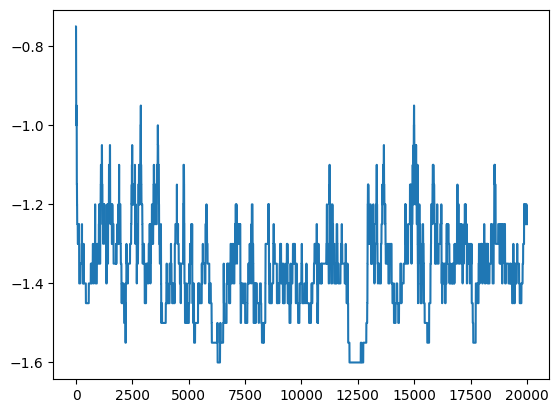

In [3]:
import matplotlib.pyplot as plt
s = simulation(N=20,L=7,T=0.5,steps=20000, seed = 2)
plt.plot(s.energies)

In [4]:
import time
for N in [5,10,50,100,200,500]:
  t1 = time.perf_counter()
  s = simulation(N=N,L=100,T=0.5,steps=100, seed = 2)
  t2 = time.perf_counter()
  print("\nN=",N,"seconds/100steps =", t2-t1)
  if t2-t1 > 30:
    print("Taking a minute for 200 steps. TOO SLOW")
    break



N= 5 seconds/100steps = 0.041310704000011356

N= 10 seconds/100steps = 0.13606755799997927

N= 50 seconds/100steps = 2.874433592999992

N= 100 seconds/100steps = 12.048045398

N= 200 seconds/100steps = 48.15205868600003
Taking a minute for 200 steps. TOO SLOW


In [5]:
import matplotlib.pyplot as plt
energies = []
Ts =  [4,2,1,0.9,0.7, 0.5, 0.2]
for T in Ts:
  print("T=",T)
  s = simulation(N=20,L=7,T=T,steps=10000, seed = numpy.random.randint(100000))
  energies.append(s.energies)

T= 4
T= 2
T= 1
T= 0.9
T= 0.7
T= 0.5
T= 0.2


In [6]:
for T,e in zip(Ts,energies):
  print("T=",T, ", <E>=", numpy.array(e).mean())
#hard to say from the energy averages when N<10, but looking at the configurations
#maybe clustering starts to happen more around 0.7
#though the plots look qualitatively different at 0.5.

#rerunning with N=20, L=7, maxT=10000, looks like it'll take about 3 min.

T= 4 , <E>= -0.8601
T= 2 , <E>= -0.93235
T= 1 , <E>= -1.0720800000000001
T= 0.9 , <E>= -1.11349
T= 0.7 , <E>= -1.2097200000000001
T= 0.5 , <E>= -1.303675
T= 0.2 , <E>= -1.5838450000000002


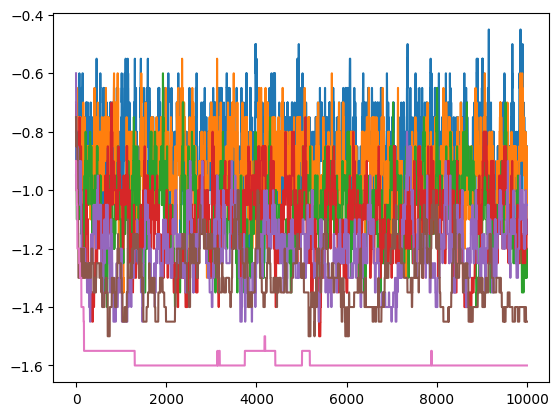

In [7]:
for e in energies:
  plt.plot(e)
# Yeah, 0.2 clusters up at the energy minimum, 0.5 touches it, and 0.7 starts clumping.

# Question 1

In [22]:
number_density = 0.8 # N/V
for i in range(1,21):
  grid_size = i**2
  N = grid_size * number_density
  print(i,N)

# Systems to test:
# L = 5, N = 20
# L = 10, N = 80
# L = 15, N = 180
# N = 320 will take far too long to test.

1 0.8
2 3.2
3 7.2
4 12.8
5 20.0
6 28.8
7 39.2
8 51.2
9 64.8
10 80.0
11 96.80000000000001
12 115.2
13 135.20000000000002
14 156.8
15 180.0
16 204.8
17 231.20000000000002
18 259.2
19 288.8
20 320.0


Sample mean = -1.63913125 +/- 0.053188887687537656


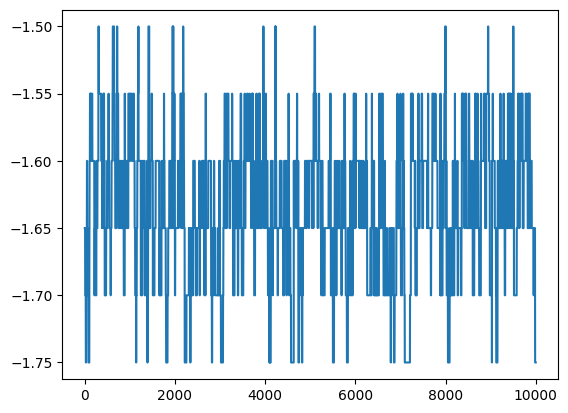

In [37]:
s = simulation(N=20,L=5,T=1.0,steps=10000, seed = numpy.random.randint(100000))
plt.plot(s.energies)

eq_energies = s.energies[2000:None] # Remove equilibration from average
avg = numpy.mean(eq_energies)
stdev = numpy.std(eq_energies)

print(f"Average energy per particle = {avg} +/- {stdev}")

Sample mean = -1.6685984375 +/- 0.030384522644079728


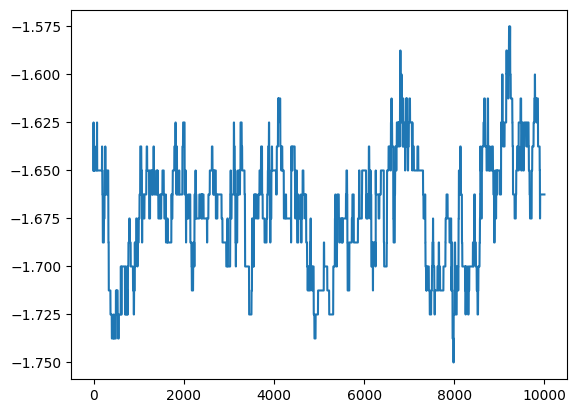

In [40]:
s = simulation(N=80,L=10,T=1.0,steps=10000, seed = numpy.random.randint(100000))
plt.plot(s.energies)

eq_energies = s.energies[2000:None] # Remove equilibration from average
avg = numpy.mean(eq_energies)
stdev = numpy.std(eq_energies)

print(f"Average energy per particle = {avg} +/- {stdev}")

Sample mean = -1.6624916666666663 +/- 0.018357515827194044


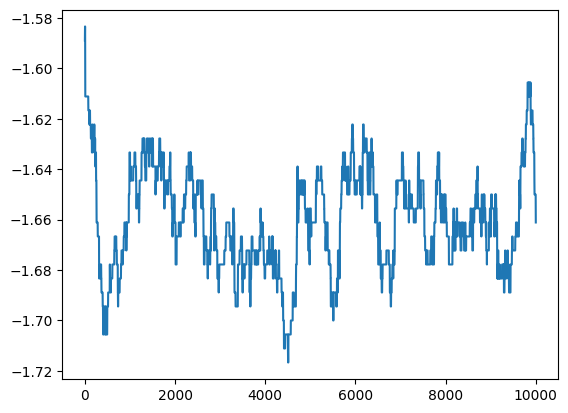

In [41]:
s = simulation(N=180,L=15,T=1.0,steps=10000, seed = numpy.random.randint(100000))
plt.plot(s.energies)

eq_energies = s.energies[2000:None] # Remove equilibration from trajectory
avg = numpy.mean(eq_energies)
stdev = numpy.std(eq_energies)

print(f"Sample mean = {avg} +/- {stdev}")

# Question 2

The per-particle average for the 5x5 grid with 20 particles was (-1.639 ± 0.0532)ϵ. The per-particle average for the 15x15 grid with 180 particles was (-1.662 ± 0.0184)ϵ. This means that the 5x5 grid average was just outside the standard deviation of the much large 15x15 grid. The per-particle average of the 10x10 grid ([-1.669 ± 0.0304]ϵ) was within the standard deviation of the 15x15 system.

Computational efficiency prevented me from testing larger grids, but this data suggests to me that a 10x10 grid is probably sufficient for computing the average per-particle energy of this system with a number density of 0.8.



# Question 3

Average energy per particle = -1.8291671874999997 +/- 0.010358692827275216


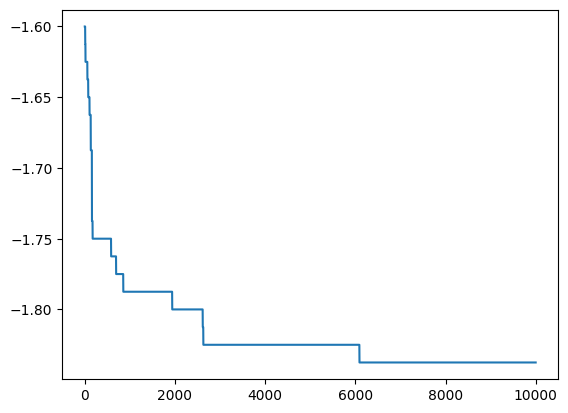

In [43]:
s = simulation(N=80,L=10,T=0.05,steps=10000, seed = numpy.random.randint(100000))
plt.plot(s.energies)

eq_energies = s.energies[2000:None] # Remove equilibration from average
avg = numpy.mean(eq_energies)
stdev = numpy.std(eq_energies)

print(f"Average energy per particle = {avg} +/- {stdev}")

In [44]:
# Equilibration will take much longer at a low temperature,
# so arguably, I should remove more of the trajectory
# from the calculation of the average.

eq_energies = s.energies[7000:None] # Remove equilibration from average
avg = numpy.mean(eq_energies)
stdev = numpy.std(eq_energies)

print(f"Average energy per particle = {avg} +/- {stdev}")

# The extremely small standard deviation indicates that, once equilibrated,
# the system barely fluctuates at all.

Average energy per particle = -1.8374999999999997 +/- 2.220446049250313e-16


# Question 4

This code mostly just repeats what I did for questions 1 and 2, but it plots the averages and standard deviations to explain my rationale visually.

In [62]:
number_density = 0.8
N_list = []
L_list = []
grid_size_list = []

for i in range(1,101):
  grid_size = i**2
  N = grid_size*number_density
  if (N % 1) == 0.0:
    N_list.append(int(N))
    L_list.append(i)
    grid_size_list.append(grid_size)
  else:
    continue

print(N_list)
print(L_list)
print(grid_size_list)
fifths = numpy.array(grid_size_list) * 0.2
print(fifths)
# I'm just having fun observing the patterns that emerge here.

[20, 80, 180, 320, 500, 720, 980, 1280, 1620, 2000, 2420, 2880, 3380, 3920, 4500, 5120, 5780, 6480, 7220, 8000]
[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[25, 100, 225, 400, 625, 900, 1225, 1600, 2025, 2500, 3025, 3600, 4225, 4900, 5625, 6400, 7225, 8100, 9025, 10000]
[   5.   20.   45.   80.  125.  180.  245.  320.  405.  500.  605.  720.
  845.  980. 1125. 1280. 1445. 1620. 1805. 2000.]


In [64]:
import time
grid_lengths = []
averages = []
stddevs = []

for i in range(len(N_list)):
  t1 = time.perf_counter()
  s = simulation(N=N_list[i],L=L_list[i],T=1.0,steps=10000, seed = numpy.random.randint(100000))
  t2 = time.perf_counter()

  eq_energies = s.energies[2000:None] # Remove equilibration from average
  grid_lengths.append(L_list[i])
  averages.append(numpy.mean(eq_energies))
  stddevs.append(numpy.std(eq_energies))

  # If the last simulation took more that 5 minutes, stop the loop.
  if t2-t1 > 300:
    break


Text(0, 0.5, 'Standard Deviation')

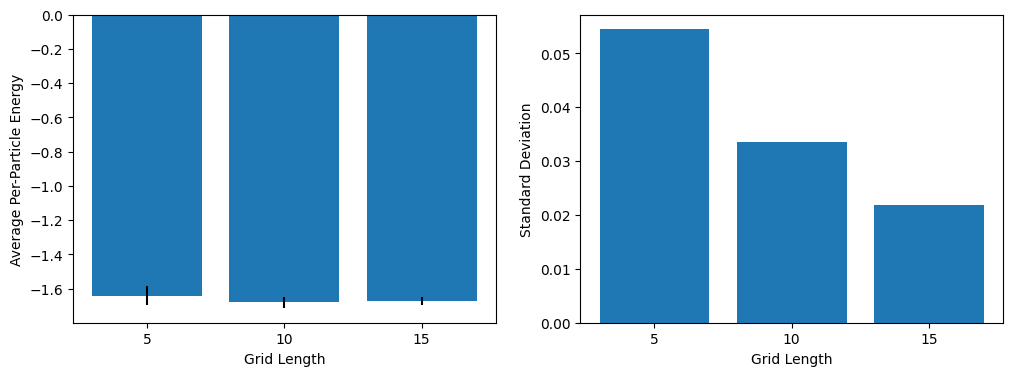

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4))

grid_lengths = [str(length) for length in grid_lengths]

ax1 = fig.add_subplot(1,2,1)
ax1.bar(grid_lengths,averages,yerr=stddevs)
ax1.set_xlabel('Grid Length')
ax1.set_ylabel('Average Per-Particle Energy')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(grid_lengths,stddevs)
ax2.set_xlabel('Grid Length')
ax2.set_ylabel('Standard Deviation')

You can see that the values for the 10x10 grid and 15x15 grid are within one standard deviation of each other. In an ideal world, one would continue trying larger grid sizes until the standard deviation stops changing, and fromt there use the smallest grid size that has the minimized standard deviation. In this case, unfortunately, the simulations become prohibitively expensive before we ever reach this point. For our purposes, it would technically be better to use the 15x15 grid, but the 10x10 grid should still yield reasonable answers and takes about 1/6 the time to run.